<a href="https://colab.research.google.com/github/tejaswaroop2310/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


## Importing the libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib



In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Retriving the data
data= pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')
#To get First five of the data
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#To get the last five rows of the data
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
data.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#To get the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#To get the statistical summary of the data
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#observations

*   The average price here is 152.

*   The average availability throughout the year is around 112 days





# Missing values

In [8]:
 #Checking for the missing Values
 data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

After seeing the missing values most of the columns here are irrevelent like the **last_review,host_name** so we will be droping them including **id** as for the security and privacy concerns.

for the **reviews_per_month** column it is Nan for the rows where the **number_of_reviews** is 0.0 so we will be replacing Nan values with 0 as there are no reviews for a particular property that means the **reviews_per_month** will be 0 automatically.

In [9]:
# droping the columns as these columns are pretty much irrevelent
data.drop(['id','host_name','last_review','name'], axis=1, inplace=True)

In [10]:

# Replacing the Nan values for the column with 0.
data.fillna({'reviews_per_month': 0},inplace=True)

In [11]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#observation 
 there are no missing values in the  data set 

In [12]:
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Correlation matrix

Here we are ploting a correlation matrix see how all the variables correlate with each other . 

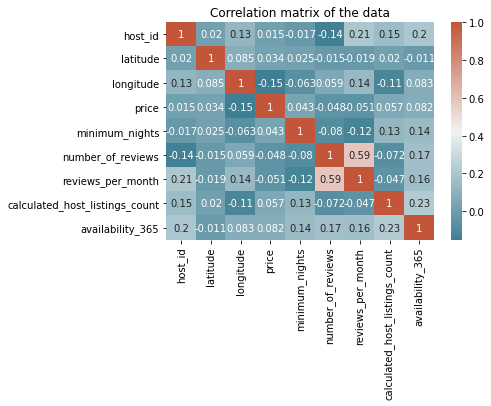

In [13]:
#Plot the correlation matrix of the data
plt.title('Correlation matrix of the data')
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns,
           yticklabels= corr.columns, annot=True,
           cmap=sns.diverging_palette(220, 20, as_cmap=True));

Upon looking into the matrix the variable are not that strongly related

Univariant analysis

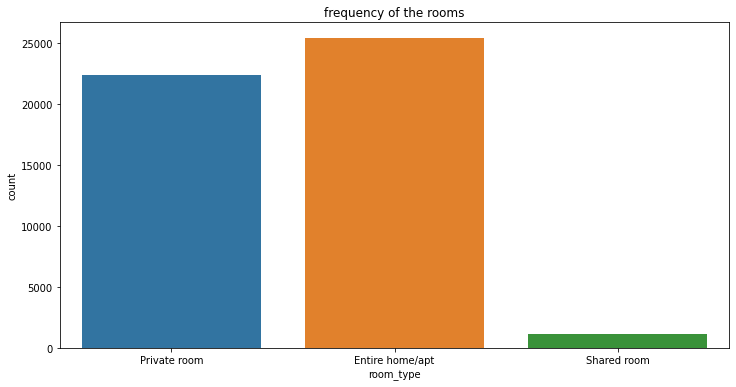

In [28]:
#plot the frequency of the different types of room
fig = plt.subplots(figsize = (12,6))
plt.title('frequency of the rooms')
ax = sns.countplot(x="room_type",data=data)
plt.show()

#Observation
From the above we can say that shared room are very less and Home,Apartments are more compared to others

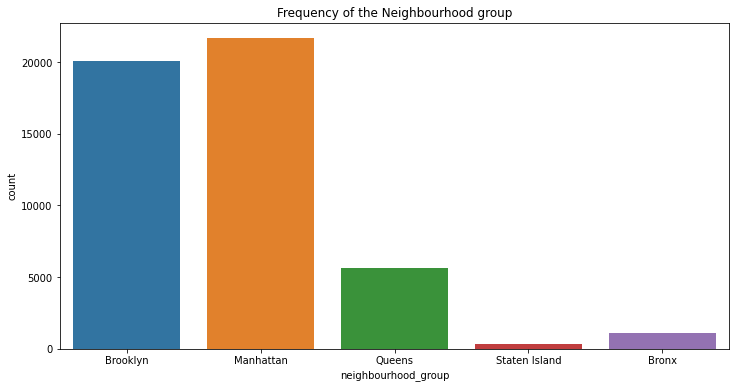

In [27]:
#plot the frequency of the neighbourhood group
fig = plt.subplots(figsize = (12,6))
plt.title('Frequency of the Neighbourhood group')
ax = sns.countplot(x="neighbourhood_group",data=data)
plt.show()

Lets check the count for both neighbourhood and room type

In [29]:
#retrive the data of neighbourhood group and room type

neighbourhood_room_type = data.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
neighbourhood_room_type

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,379,9559,13199,2096,176
Private room,652,10132,7982,3372,188
Shared room,60,413,480,198,9


Text(0.5, 1.0, 'frequency of the both room type and neighbourhood group')

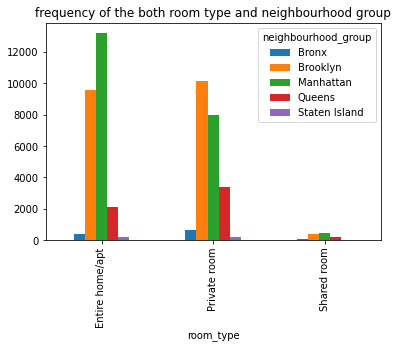

In [42]:
#plot the frequency of the room types with different neighbourhood group

neighbourhood_room_type.plot(kind='bar')
plt.title('frequency of the both room type and neighbourhood group')


#Observation
we can see that in manhatten the entire home room_types are high in number whereas when it comes to private room types we can Brooklyn is in the lead .

It can be seen that there are a few number of listing for shared room types on airbnb.

we can see that listings for entire room/apt is higher is higher in number overall . 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


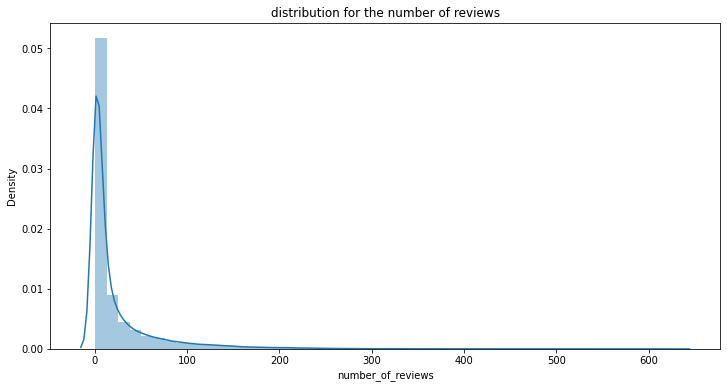

In [19]:
#plot the distribution of the number of reviews
fig = plt.subplots(figsize = (12,6))
plt.title('distribution for the number of reviews')
sns.distplot(data['number_of_reviews'])

From the above plot we can see the positive skew matrix ,Most of the room are having very few reviews

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution for the availabity of the rooms')

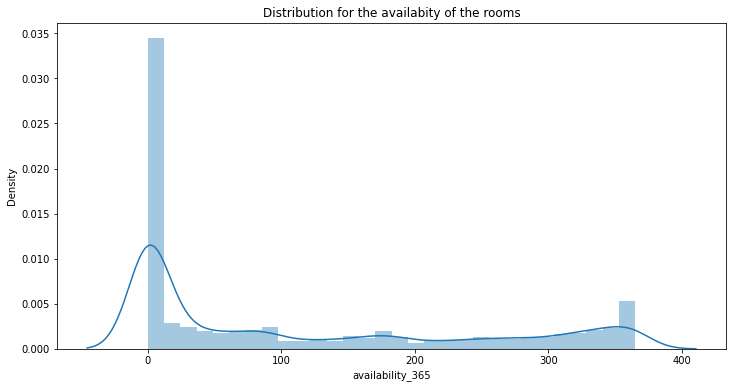

In [24]:
#plot the Distribution for the availability of the rooms

fig = plt.subplots(figsize = (12,6))
sns.distplot(data['availability_365'])
plt.title('Distribution for the availabity of the rooms')

Most of the room are having zero days of availability and there are some room having 365 days availability

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution for the night stay')

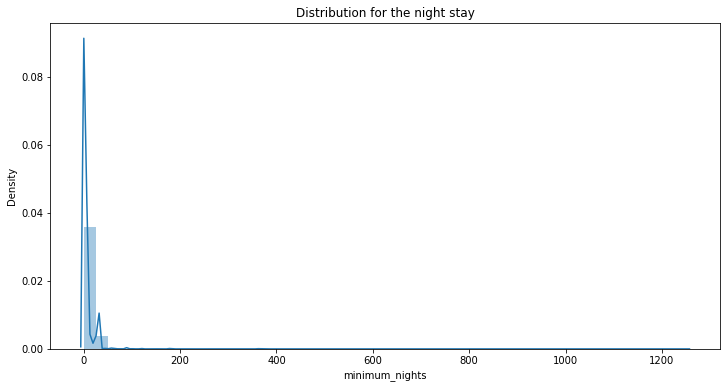

In [23]:
#plot the distribution for the night stay availability

fig = plt.subplots(figsize = (12,6))
sns.distplot(data['minimum_nights'])
plt.title('Distribution for the night stay')

From the above plot,Very Few Room provides night stays 

#Bivariate Analysis

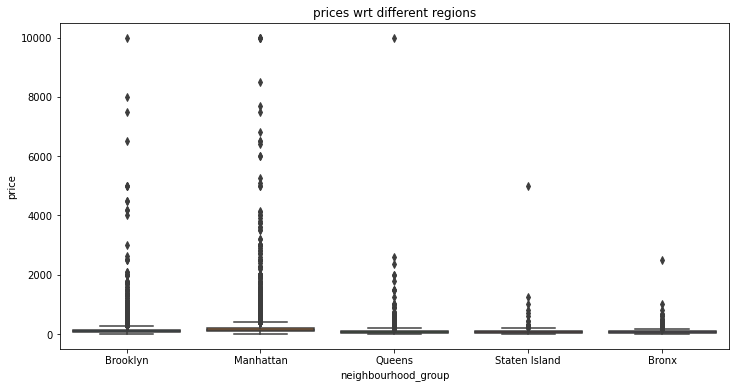

In [ ]:
#plot the boxplot between price and neighbourhood group
fig, ax = plt.subplots(figsize = (12,6))
plt_2=sns.boxplot(x='neighbourhood_group',y='price', data= data)
plt_2.set_title('prices wrt different regions');

Manhattan has higher prices compared to the other places

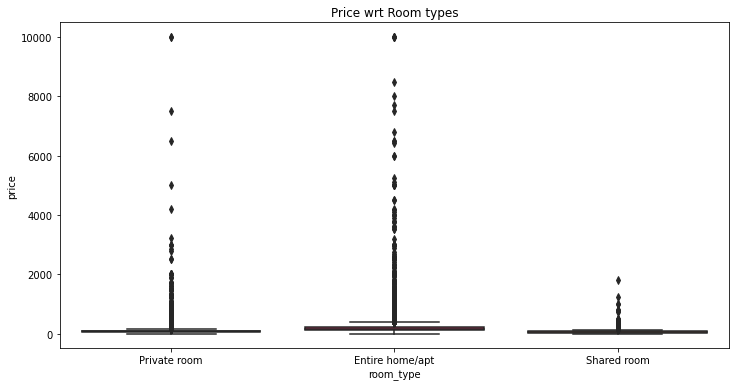

In [ ]:
#plot the boxplot between price room and room types
fig, ax = plt.subplots(figsize = (12,6))
plt_5= sns.boxplot(x= 'room_type', y= 'price', data= data, palette= 'rocket')
plt_5.set_title('Price wrt Room types');

We can see Home/apartment are having higher prices compared to other room types

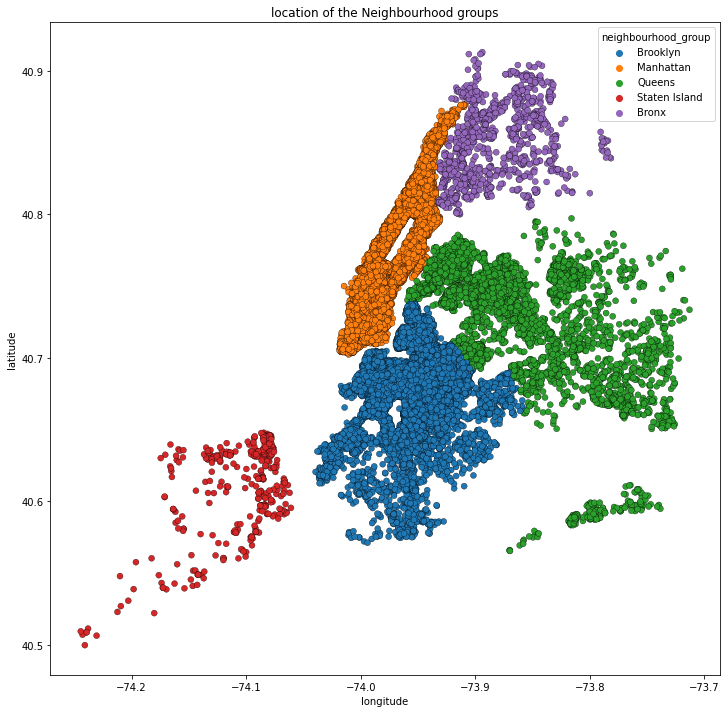

In [22]:
#plot the scatter plot between logitudes ,latitudes and neighbourhood
fig, ax = plt.subplots(figsize = (12,12))
plt.title('location of the Neighbourhood groups')
sns.scatterplot(x= 'longitude', y='latitude',hue= 'neighbourhood_group',edgecolor='black',linewidth=0.3, data=data)

#Summary


*   As Staten Island is an island the availability of rooms is less compared to other places
*   The Room prices are high in manhattan, I think there is a lot of demand for these rooms
* As Home/apartments are more facilities, they are having more prices compared to other types of rooms
*Most of the rooms are having zero days of availability and there are only a few rooms with 365 days of availability
*  the entire home/Apartment room_types are high in Manhattan whereas when it comes to private room types we can Brooklyn is in the lead.





